In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import h5py 
import pickle

In [2]:
#Importing the dataset

train = pd.read_csv('train-small.csv')
test = pd.read_csv('test.csv')
val = pd.read_csv('valid-small.csv')

In [3]:
train

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,00015869_010.png,0,0,0,0,0,0,0,0,0,0,0,15869,0,0,0
996,00020113_005.png,0,0,0,0,1,0,0,0,0,0,0,20113,0,0,0
997,00019939_000.png,0,0,0,0,0,0,0,0,0,0,0,19939,0,0,0
998,00030496_000.png,0,0,0,0,0,0,0,0,0,0,0,30496,0,0,0


In [4]:
test

,Image,PatientId,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00021463_005.png,21463,0,0,1,1,1,0,0,1,0,0,0,0,1,0
1,00019733_002.png,19733,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,00021463_001.png,21463,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00017136_020.png,17136,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,00027477_000.png,27477,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,00010497_000.png,10497,0,0,0,0,0,1,0,0,0,0,0,0,0,0
416,00017262_001.png,17262,0,0,0,0,0,1,0,0,0,0,0,0,0,0
417,00021653_000.png,21653,0,0,0,0,0,1,0,0,0,1,0,0,0,0
418,00017243_001.png,17243,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [5]:
val

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,00025695_017.png,0,0,0,0,1,0,0,0,0,0,0,25695,0,0,1
196,00029454_000.png,0,0,0,0,0,0,0,0,0,0,0,29454,0,0,0
197,00020213_004.png,0,0,0,0,0,0,0,0,1,0,0,20213,0,0,0
198,00003272_000.png,0,0,0,0,0,0,0,1,0,0,0,3272,0,0,0


In [6]:
print(f"Train set: The total patient ids are {train['PatientId'].count()}, from those the unique ids are {train['PatientId'].value_counts().shape[0]} ")
print(f"Validation set: The total patient ids are {val['PatientId'].count()}")
print(f"Test set: The total patient ids are {test['PatientId'].count()}")

Train set: The total patient ids are 1000, from those the unique ids are 928 
Validation set: The total patient ids are 200
Test set: The total patient ids are 420


In [7]:
def check_for_leakage(df1, df2, patient_col):
    """
    Return True if there any patients are in both df1 and df2.

    Args:
        df1 (dataframe): dataframe describing first dataset
        df2 (dataframe): dataframe describing second dataset
        patient_col (str): string name of column with patient IDs
    
    Returns:
        leakage (bool): True if there is leakage, otherwise False
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    df1_patients_unique = set(df1[patient_col])
    df2_patients_unique = set(df2[patient_col])
    
    patients_in_both_groups = list(df1_patients_unique.intersection(df2_patients_unique))

    # leakage contains true if there is patient overlap, otherwise false.
    leakage = len(patients_in_both_groups) > 0 
    
    ### END CODE HERE ###
    
    return leakage

In [8]:
print("leakage between train and test: {}".format(check_for_leakage(train, test, 'PatientId')))
print("leakage between valid and test: {}".format(check_for_leakage(val, test, 'PatientId')))

leakage between train and test: False
leakage between valid and test: False


In [9]:
columns = train.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [10]:
# Remove unnecesary elements
columns.remove('Image')
columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")
# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {train[column].sum()} samples")

There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


Display Random Images


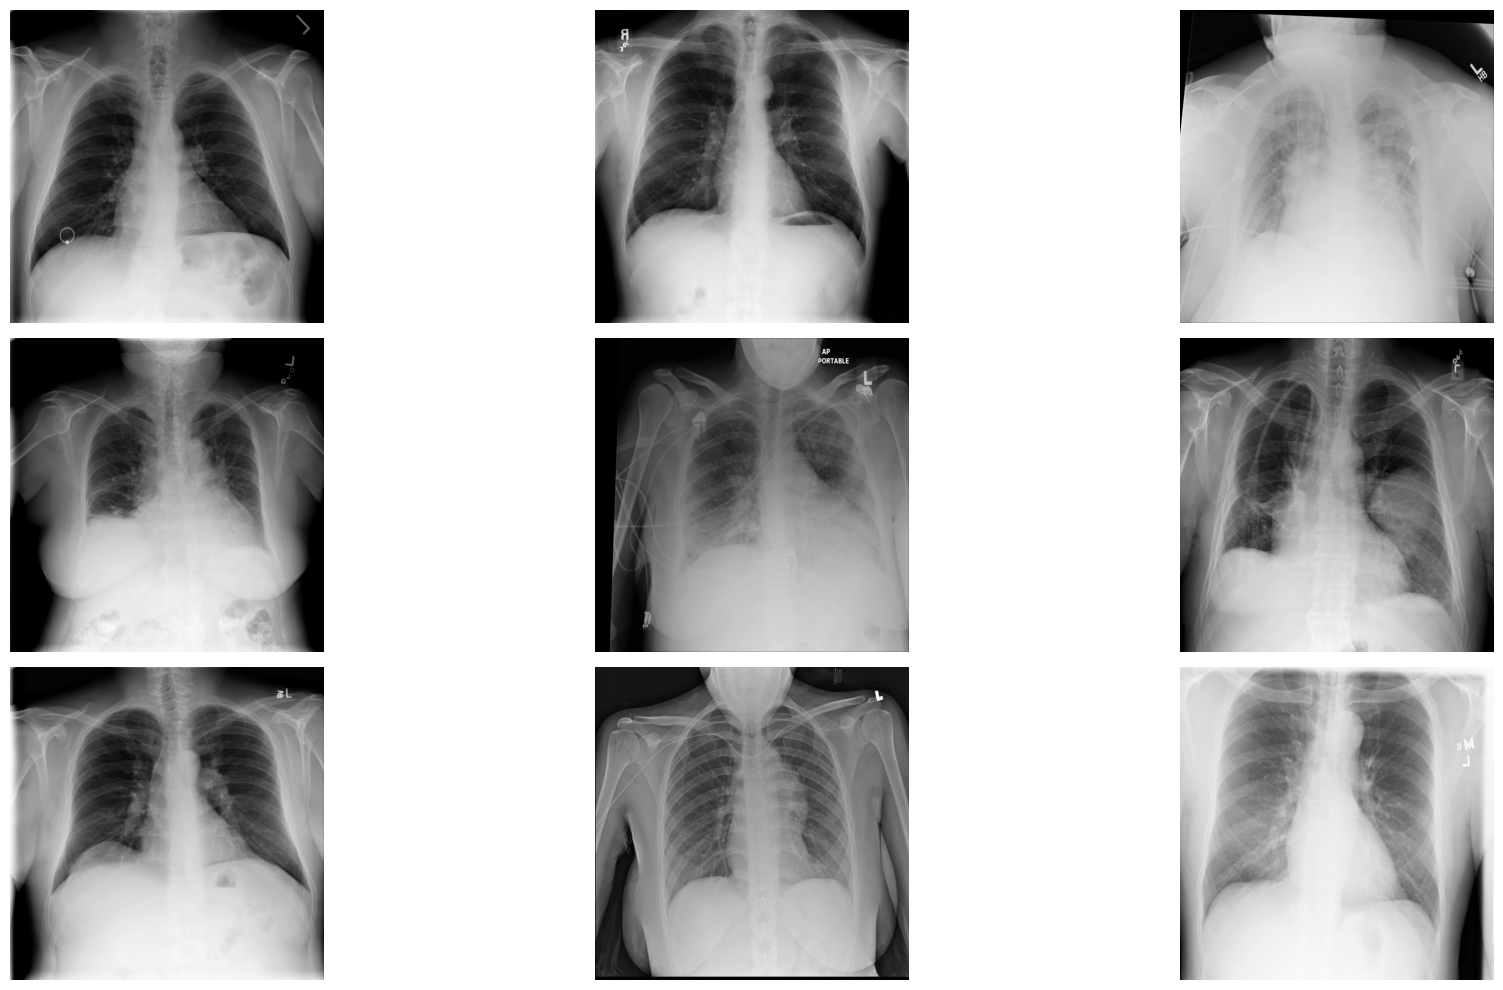

In [11]:
# Data Visualization
import os
# Extract numpy values from Image column in data frame
images = train['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = 'Images'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


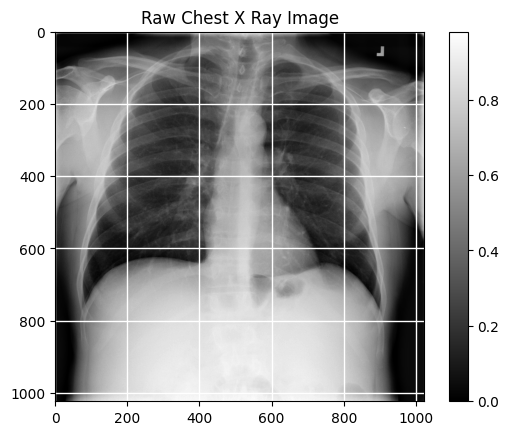

In [12]:
# Get the first image that was listed in the train_df dataframe
sample_img = train.Image[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.grid(color='w', linestyle='-', linewidth=1)
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

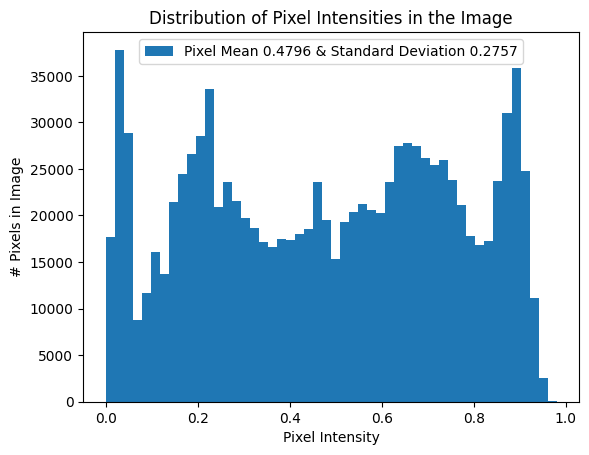

In [13]:
# pixel Value Diviation
pixels = np.reshape(raw_image,raw_image.shape[0]*raw_image.shape[1])
plt.hist(pixels, bins=50, label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}')
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')
plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    """
    Return generator for training set, normalizing using batch
    statistics.

    Args:
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        train_generator (DataFrameIterator): iterator over training set
    """        
    print("getting train generator...") 
    # Normalize images  --- Generate batches of tensor image data with real-time data augmentation
    image_generator = ImageDataGenerator(
        samplewise_center=True,              #Set each sample mean to 0
        samplewise_std_normalization= True)  # Divide each input by its standard deviation
    
    # flow from directory with specified batch size and target image size
    # flow_from_dataframe ==> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    # RETURNS a DataFrameIterator yielding tuples of (x, y) where x is a numpy array containing a batch of images with 
    # shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels
    # default data format of ImageGenerator is channels_last
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",       #  Mode for yielding the targets, one of "binary", "categorical", "input", "multi_output", "raw", sparse" or None. Default: "categorical".
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
    return generator

In [16]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, x_col, y_cols, sample_size=100, batch_size=8, 
                                 seed=1, target_w = 320, target_h = 320):
    """
    Return generator for validation set and test test set using 
    normalization statistics from training set.

    Args:
      valid_df (dataframe): dataframe specifying validation data.
      test_df (dataframe): dataframe specifying test data.
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      sample_size (int): size of sample to use for normalization statistics.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        test_generator (DataFrameIterator) and valid_generator: iterators over test set and validation set respectively
    """
    # get generator to sample dataset
    print(f"\nextracting {sample_size} train images to normalize validation and test datasets...")

    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        directory=IMAGE_DIR, 
        x_col="Image", 
        y_col=labels, 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_w, target_h))
    
    # get data sample
    batch = next(raw_train_generator) # generate a batch of samples and associated labels 
    data_sample = batch[0]             # => we need only the sample imgs ie batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data - we use this generator normalizing mean and std using the train sample of 100
    image_generator.fit(data_sample)
    
    print("\ngetting valid generator...")

    # get test generator
    valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    
    print("\ngetting test generator...")
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    return valid_generator, test_generator

In [17]:
labels = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
              'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']
IMAGE_DIR = "Images/"
train_generator = get_train_generator(train, IMAGE_DIR, "Image", labels)
valid_generator, test_generator= get_test_and_valid_generator(val, test, train, IMAGE_DIR, "Image", labels)

getting train generator...
Found 1000 validated image filenames.



extracting 100 train images to normalize validation and test datasets...
Found 1000 validated image filenames.

getting valid generator...
Found 200 validated image filenames.

getting test generator...
Found 420 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9120169..1.9989136].


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 2.8194 and the minimum is -3.4863
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


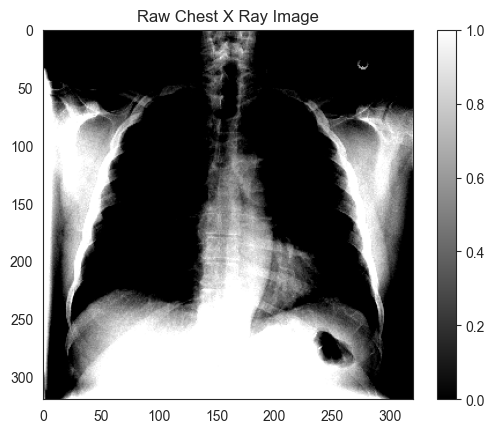

In [18]:
# Plot a processed image
sns.set_style("white")
generated_image, label = train_generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

In [19]:
print(generated_image.shape, generated_image[0].shape)
print(raw_image.shape)

(8, 320, 320, 3) (320, 320, 3)
(1024, 1024)


C:\Users\yashk\AppData\Local\Temp\ipykernel_19892\974904206.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),
C:\Users\yashk\AppData\Local\Temp\ipykernel_19892\974904206.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image[0].ravel(),


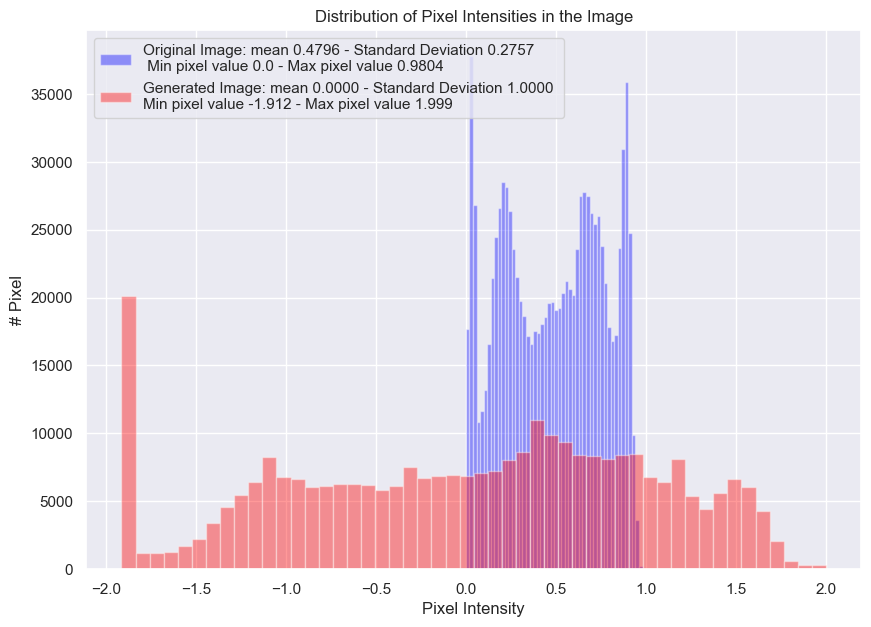

In [20]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')
plt.show()

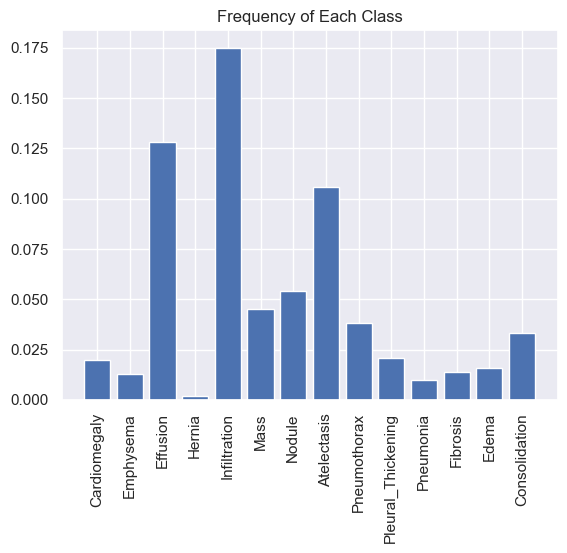

In [21]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

In [22]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequences for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
    Returns:
        positive_frequencies (np.array): array of positive frequences for each
                                         class, size (num_classes)
        negative_frequencies (np.array): array of negative frequences for each
                                         class, size (num_classes)
    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis=0)/N
    negative_frequencies = (N - np.sum(labels, axis=0))/N  # broadcasting of N to a line vector of dim num_classes

    ### END CODE HERE ###
    return positive_frequencies, negative_frequencies

In [23]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)
freq_pos

array([0.02 , 0.013, 0.128, 0.002, 0.175, 0.045, 0.054, 0.106, 0.038,
       0.021, 0.01 , 0.014, 0.016, 0.033])

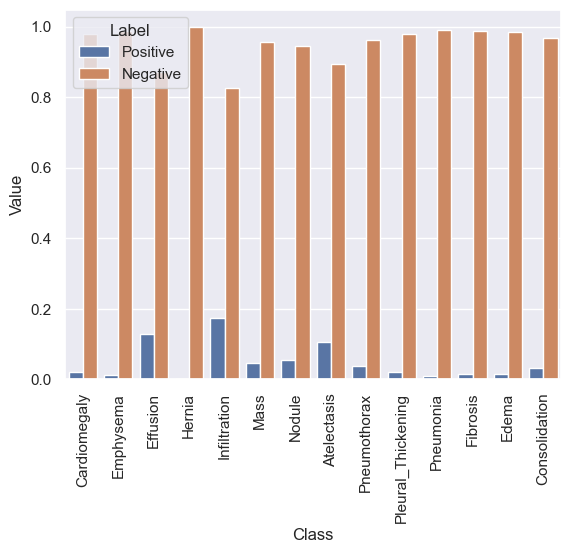

In [24]:
# Create initial DataFrame
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})

# Create the new rows and use pd.concat() to add them to the DataFrame
new_rows = pd.DataFrame([{"Class": labels[l], "Label": "Negative", "Value": v} for l, v in enumerate(freq_neg)])
data = pd.concat([data, new_rows], ignore_index=True)

# Plotting the data
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label", data=data)
plt.show()


In [25]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

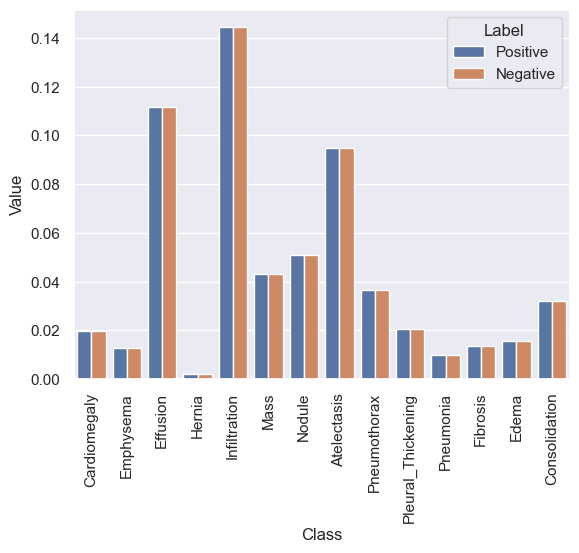

In [26]:
# Create initial DataFrame with positive contributions
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})

# Create a DataFrame for negative contributions
negative_data = pd.DataFrame([{"Class": labels[l], "Label": "Negative", "Value": v} 
                              for l, v in enumerate(neg_contribution)])

# Concatenate the two DataFrames
data = pd.concat([data, negative_data], ignore_index=True)

# Plotting the data
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label", data=data)
plt.show()


In [27]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)
    
    Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value. 

        Args:
            y_true (Tensor): Tensor of true labels, size is (num_examples, num_classes)
            y_pred (Tensor): Tensor of predicted labels, size is (num_examples, num_classes)
        Returns:
            loss (Float): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0
        
        ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class 
            loss += - pos_weights[i] * K.mean(y_true[:,i] * K.log(y_pred[:,i] + epsilon)) \
            - neg_weights[i] * K.mean((1-y_true[:,i]) * K.log(1-y_pred[:,i] + epsilon)) #complete this line
        return loss
    
        ### END CODE HERE ###
    return weighted_loss             # this is a function taking 2 arguments y_true and y_pred

In [28]:
# import keras
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, TensorBoard
from keras.preprocessing import image

def load_C3M3_model():
   
    class_pos = train.loc[:, labels].sum(axis=0)
    class_neg = len(train) - class_pos
    class_total = class_pos + class_neg

    pos_weights = class_pos / class_total
    neg_weights = class_neg / class_total
    print("Got loss weights")
    # create the base pre-trained model
    base_model = DenseNet121(weights='densenet.hdf5', include_top=False)
    print("Loaded DenseNet")
    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # and a logistic layer
    predictions = Dense(len(labels), activation="sigmoid")(x)
    print("Added layers")

    model = Model(inputs=base_model.input, outputs=predictions)
    
    model.compile(optimizer='adam', loss=get_weighted_loss(neg_weights, pos_weights))
    print("Compiled Model")

    model.load_weights("pretrained_model.h5")
    print("Loaded Weights")
    return model


In [29]:
model = load_C3M3_model()

Got loss weights
Loaded DenseNet
Added layers
Compiled Model
Loaded Weights


In [34]:
model.save("classification_model.h5")
print("Model saved as classification_model.h5")

Model saved as classification_model.h5


In [30]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,408 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, None,      │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, None,      │          0 │ conv2_block1_0_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, None,      │          0 │ pool1[0][0],      │
│ (Concatenate)       │ None, 96)         │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, None,      │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, None,      │          0 │ conv2_block2_0_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, None,      │     12,288 │ conv2_block2_0_r

 Total params: 7,051,854 (26.90 MB)

 Trainable params: 6,968,206 (26.58 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [31]:
# Print out the total number of layers
layers_ = model.layers
print('total number of layers =',len(layers_))

total number of layers = 429


In [32]:
# The find() method returns an integer value:
# If substring doesn't exist inside the string, it returns -1, otherwise returns first occurence index
conv2D_layers = [layer for layer in model.layers 
                if str(type(layer)).find('Conv2D') > -1]

In [33]:
print('Model input -------------->', model.input)
print('Feature extractor output ->', model.get_layer('conv5_block16_concat').output)
print('Model output ------------->', model.output)

Model input --------------> <KerasTensor shape=(None, None, None, 3), dtype=float32, sparse=False, name=keras_tensor>
Feature extractor output -> <KerasTensor shape=(None, None, None, 1024), dtype=float32, sparse=False, name=keras_tensor_424>
Model output -------------> <KerasTensor shape=(None, 14), dtype=float32, sparse=False, name=keras_tensor_428>


Epoch 1/25


C:\Users\yashk\AppData\Local\Temp\ipykernel_19892\1087513255.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  loss += - pos_weights[i] * K.mean(y_true[:,i] * K.log(y_pred[:,i] + epsilon)) \
C:\Users\yashk\AppData\Local\Temp\ipykernel_19892\1087513255.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  - neg_weights[i] * K.mean((1-y_true[:,i]) * K.log(1-y_pred[:,i] + epsilon)) #complete this line


100/100 ━━━━━━━━━━━━━━━━━━━━ 347s 3s/step - loss: 0.6600 - val_loss: 0.9894
Epoch 2/25
 25/100 ━━━━━━━━━━━━━━━━━━━━ 3:45 3s/step - loss: 0.6581

c:\Users\yashk\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 733ms/step - loss: 0.6208
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - loss: 0.6081 - val_loss: 0.5828
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 712ms/step - loss: 0.5366
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - loss: 0.5509 - val_loss: 0.5609
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 714ms/step - loss: 0.5049
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - loss: 0.5331 - val_loss: 0.5509
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 712ms/step - loss: 0.5028
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - loss: 0.4764 - val_loss: 0.5345
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 712ms/step - loss: 0.4713
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - loss: 0.4376 - val_loss: 0.5587
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 719ms/step - loss: 0.4848
Epoch 13/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - loss: 0.4406 - val_loss: 0.5094
Epoch 14/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 711ms/step - loss: 0

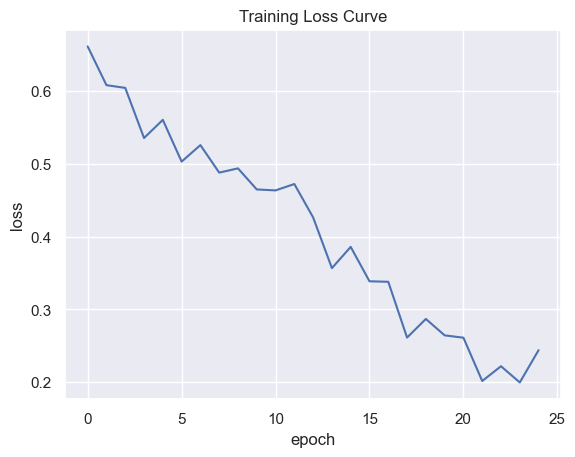

In [35]:
history = model.fit(train_generator, 
                              validation_data=valid_generator,
                              steps_per_epoch=100, 
                              validation_steps=25, 
                              epochs = 25)

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

In [89]:
predicted_vals = model.predict(test_generator, steps = len(test_generator))
predicted_vals.shape  # number of test samples x number of classes to predict

c:\Users\yashk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 665ms/step


(420, 14)

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_roc_curve(labels, predicted_vals, generator):
    auc_roc_vals = []
    for i in range(len(labels)):
        try:
            gt = generator.labels[:, i]
            pred = predicted_vals[:, i]
            auc_roc = roc_auc_score(gt, pred)
            auc_roc_vals.append(auc_roc)
            fpr_rf, tpr_rf, _ = roc_curve(gt, pred)
            plt.figure(1, figsize=(10, 10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr_rf, tpr_rf,
                     label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.legend(loc='best')
        except:
            print(
                f"Error in generating ROC curve for {labels[i]}. "
                f"Dataset lacks enough examples."
            )
    plt.savefig('ROC.png')
    plt.show()
    return auc_roc_vals

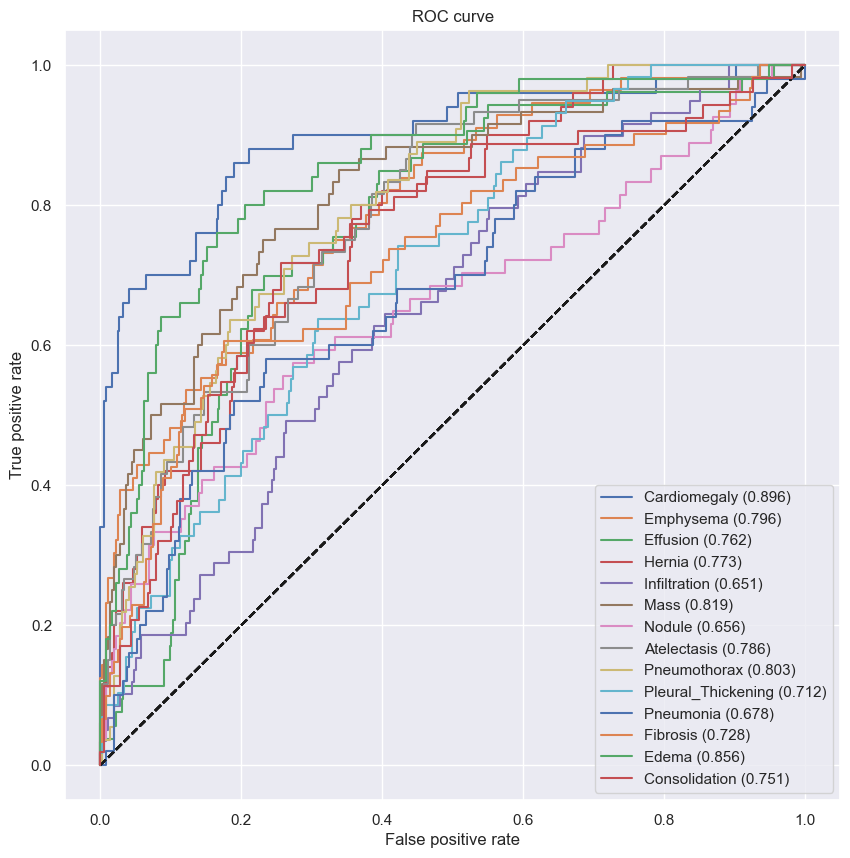

In [91]:
auc_rocs = get_roc_curve(labels, predicted_vals, test_generator)

In [92]:
print("areas under the curve : {} \n for all {} classes".format(auc_rocs,len(auc_rocs)))

areas under the curve : [np.float64(0.8959999999999999), np.float64(0.796212715855573), np.float64(0.7624800781450825), np.float64(0.772918918918919), np.float64(0.6508756279637542), np.float64(0.8191203703703703), np.float64(0.6556871078729002), np.float64(0.7858796296296295), np.float64(0.8027397260273972), np.float64(0.712421413602591), np.float64(0.6778918918918919), np.float64(0.728024110689986), np.float64(0.8562162162162162), np.float64(0.7514266618682844)] 
 for all 14 classes


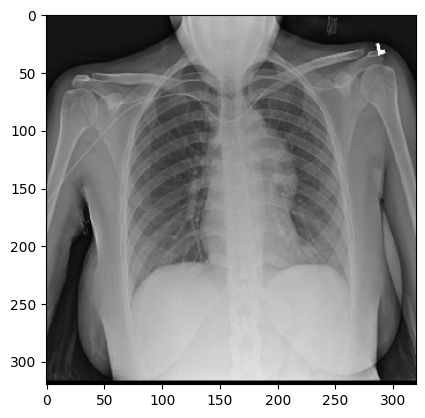

In [ ]:
sns.reset_defaults()

def get_mean_std_per_batch(df, H=320, W=320):
    sample_data = []
    for idx, img in enumerate(df.sample(100)["Image"].values):
        path = IMAGE_DIR + img
        sample_data.append(np.array(image.load_img(path, target_size=(H, W))))

    mean = np.mean(sample_data[0])
    std = np.std(sample_data[0])
    return mean, std    

def load_image_normalize(path, mean, std, H=320, W=320):
    x = image.load_img(path, target_size=(H, W))
    x -= mean
    x /= std
    x = np.expand_dims(x, axis=0)
    return x

def load_image(path, df, preprocess=True, H = 320, W = 320):
    """Load and preprocess image."""
    x = image.load_img(path, target_size=(H, W))
    if preprocess:
        mean, std = get_mean_std_per_batch(df, H=H, W=W)
        x -= mean
        x /= std
        x = np.expand_dims(x, axis=0)
    return x

im_path = IMAGE_DIR + '00025288_001.png' 
x = load_image(im_path, train, preprocess=False)
plt.imshow(x, cmap = 'gray')
plt.show()

In [94]:
mean, std = get_mean_std_per_batch(train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


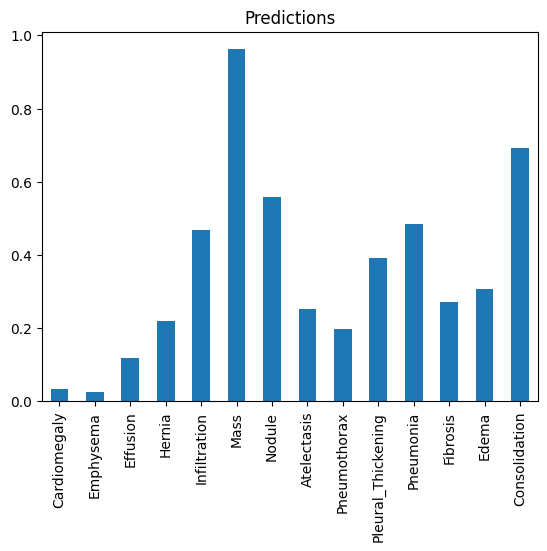

In [ ]:
labels = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
              'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']

processed_image = load_image_normalize(im_path, mean, std)
preds = model.predict(processed_image)
pred_df = pd.DataFrame(preds, columns = labels)
pred_df.loc[0, :].plot.bar()
plt.title("Predictions")
plt.savefig('predictions.png')
plt.show()

In [96]:
pred_df

,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,0.032761,0.024449,0.119662,0.219575,0.468005,0.961658,0.558564,0.253628,0.19872,0.390417,0.484679,0.271387,0.306029,0.691624


In [ ]:
# spatial_maps =  model.get_layer('conv5_block16_concat').output
# print(spatial_maps)

<KerasTensor shape=(None, None, None, 1024), dtype=float32, sparse=False, name=keras_tensor_853>


In [ ]:
# def get_spatial_maps(input_tensor):
#     # Forward pass through the model and compute spatial maps
#     model_output = model(input_tensor)
#     return model_output, spatial_maps

# # Example usage:
# # Assuming `spatial_maps` is a tensor computed elsewhere in your code
# # and `input_data` is the data you want to pass to the model
# input_data = tf.random.normal((1, 224, 224, 3))  # Example input
# model_output, spatial_map_output = get_spatial_maps(input_data)

# print("Model Output:", model_output)
# print("Spatial Maps:", spatial_map_output)

Model Output: tf.Tensor(
[[0.09457274 0.05595411 0.7977601  0.52264524 0.8903313  0.58387095
  0.5317416  0.739632   0.1745159  0.28487825 0.63072157 0.00583715
  0.42711037 0.6845413 ]], shape=(1, 14), dtype=float32)
Spatial Maps: <KerasTensor shape=(None, None, None, 1024), dtype=float32, sparse=False, name=keras_tensor_853>


In [ ]:
# # get an image
# x = load_image_normalize(im_path, mean, std)
# print(f"x is of type {type(x)}")
# print(f"x is of shape {x.shape}")

x is of type <class 'numpy.ndarray'>
x is of shape (1, 320, 320, 3)


In [ ]:
# # get the 0th item in the list
# spatial_maps_x = get_spatial_maps([x])[0]
# print(f"spatial_maps_x is of type {type(spatial_maps_x)}")
# print(f"spatial_maps_x is of shape {spatial_maps_x.shape}")
# print(f"spatial_maps_x without the batch dimension has shape {spatial_maps_x[0].shape}")

c:\Users\yashk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_429. Received: the structure of inputs=['*']
  warnings.warn(


spatial_maps_x is of type <class 'tensorflow.python.framework.ops.EagerTensor'>
spatial_maps_x is of shape (1, 14)
spatial_maps_x without the batch dimension has shape (14,)


In [ ]:
# # get the output of the model
# output_with_batch_dim = model.output
# print(f"Model output includes batch dimension, has shape {output_with_batch_dim.shape}")
# print(f"excluding the batch dimension, the output for all 14 categories of disease has shape {output_with_batch_dim[0].shape}")

Model output includes batch dimension, has shape (None, 14)
excluding the batch dimension, the output for all 14 categories of disease has shape (14,)


In [ ]:
# # Get the first category's output (Cardiomegaly) at index 0
# y_category_0 = output_with_batch_dim[0][0]
# print(f"The Cardiomegaly output is at index 0, and has shape {y_category_0.shape}")

The Cardiomegaly output is at index 0, and has shape ()


In [128]:

# with tf.GradientTape() as tape:
#     # Watch the variable you want gradients with respect to
#     tape.watch(spatial_maps)

#     # Compute the output or loss for which gradients are needed
#     output = y_category_0  # Replace with your specific scalar out/aput or loss

# # Compute the gradient of the output with respect to spatial_maps
# gradient = tape.gradient(output, spatial_maps)

# print(f"Gradient is of type {type(gradient)}")
# print(gradient)

In [130]:
# import tensorflow as tf

# # Create a submodel to extract the spatial_maps
# spatial_maps_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('conv5_block16_concat').output)

# # Example input data
# input_data = tf.random.normal((1, 224, 224, 3))  # Adjust shape as per your model's input requirements

# # Perform a forward pass to get actual tensors
# spatial_maps = spatial_maps_model(input_data)  # Now spatial_maps is a tf.Tensor
# y_category_0 = model(input_data)[0, 0]  # Example: Get the output for a specific category (scalar)

# # Compute gradients
# with tf.GradientTape() as tape:
#     tape.watch(spatial_maps)  # Watch spatial_maps for gradients
#     output = y_category_0  # Target scalar for gradient computation

# gradient = tape.gradient(output, spatial_maps)

# print(f"Gradient shape: {gradient.shape}")
# print(gradient)


In [37]:
# import tensorflow as tf

# # Create a submodel to extract spatial_maps
# spatial_maps_model = tf.keras.Model(
#     inputs=model.input, 
#     outputs=model.get_layer('conv5_block16_concat').output
# )

# # Example input data (ensure it matches the model's expected input shape)
# input_data = tf.random.normal((1, 224, 224, 3))  # Adjust shape for your model

# # Perform a forward pass to get actual tensors
# with tf.GradientTape() as tape:
#     tape.watch(input_data)  # Watch input_data for gradient propagation

#     # Compute spatial_maps using the submodel
#     spatial_maps = spatial_maps_model(input_data)
    
#     # Compute the full model output to get the category output
#     full_output = model(input_data)
    
#     # Example: Use a specific category (e.g., index 0) as the scalar output
#     y_category_0 = full_output[0, 0]

#     # Ensure y_category_0 is dependent on spatial_maps
#     print("Spatial maps shape:", spatial_maps.shape)
#     print("Output shape:", y_category_0.shape)

# # Compute gradients
# gradient = tape.gradient(y_category_0, spatial_maps)

# # Check if gradient is computed
# if gradient is not None:
#     print(f"Gradient shape: {gradient.shape}")
#     print(gradient)
# else:
#     print("Gradient computation returned None. Ensure dependencies are correct.")
